In [1]:
!pip install joblib==1.4.2 numpy==2.2.3 scikit-learn==1.6.1 --no-cache-dir


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/12.6 MB 2.1 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.6 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.6 MB 2.7 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.6 MB 2.9 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/12.6 MB 3.0 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.6 MB 3.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.6 MB 3.1 MB/s eta 0:00:03
   --------------------- ------------------ 6.8/12.6 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 3.1 MB/s eta 0:00:02
   ----------

In [ ]:
!pip install imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [4]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [5]:
# Check for missing values
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [6]:
# Encode categorical variables
encode = LabelEncoder()
df['new_gender'] = encode.fit_transform(df['Gender'])
df['new_class'] = encode.fit_transform(df['CLASS'])

In [7]:
# Drop unnecessary columns
df.drop(['Gender', 'CLASS', 'ID', 'No_Pation'], axis=1, inplace=True)


In [8]:
# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['new_class'], axis=1))

In [9]:
# Split the data into features and target
x = x_scaled
y = df['new_class']

In [10]:
x

array([[-0.40114429, -0.14478078, -0.38267195, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       [-3.13001704, -0.21295413, -0.11580401, ..., -0.34264878,
        -1.32623876,  0.87034341],
       [-0.40114429, -0.14478078, -0.38267195, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       ...,
       [-2.67520491,  0.67329948,  0.20110167, ...,  1.70554268,
        -0.43912523,  0.87034341],
       [-1.76558067,  0.23017268, -0.16584175, ...,  3.31678663,
         2.2020537 ,  0.87034341],
       [ 0.05366783, -0.04252074, -0.03240778, ..., -0.31533956,
         0.68992836,  0.87034341]], shape=(1000, 11))

In [11]:
# Oversample the minority class
ros = RandomOverSampler(random_state=20)
x_res, y_res = ros.fit_resample(x, y)

In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=50)

In [13]:
x_train

array([[-0.40114429, -0.14478078, -0.26591722, ..., -0.26072112,
        -1.12462205,  0.87034341],
       [-1.76558067,  0.33243271,  0.23446017, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-1.76558067,  0.33243271,  0.23446017, ..., -0.28803034,
        -1.00365203,  0.87034341],
       ...,
       [-0.40114429, -0.1106941 , -0.11580401, ..., -0.34264878,
        -2.13270561,  0.87034341],
       [-1.76558067,  0.33243271,  0.23446017, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-1.76558067,  0.33243271,  0.23446017, ..., -0.28803034,
        -1.00365203,  0.87034341]], shape=(2940, 11))

In [14]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr_pred = lr.predict(x_test)
print(classification_report(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       250
           1       0.90      1.00      0.95       239
           2       0.86      0.95      0.90       256
           3       0.98      0.86      0.92       257
           4       0.95      1.00      0.97       258

    accuracy                           0.93      1260
   macro avg       0.93      0.93      0.93      1260
weighted avg       0.93      0.93      0.93      1260

[[208  13  27   2   0]
 [  0 239   0   0   0]
 [  0  11 242   3   0]
 [  6   2  12 222  15]
 [  0   0   0   0 258]]


In [15]:
from sklearn.model_selection import GridSearchCV


log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # saga handles all penalties including elasticnet
    'max_iter': [500]
}

grid_log = GridSearchCV(LogisticRegression(), log_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(x_train, y_train)

print("Best parameters:", grid_log.best_params_)
print("Best score:", grid_log.best_score_)

y_log_tuned_pred = grid_log.predict(x_test)
print(classification_report(y_test, y_log_tuned_pred))


c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\

Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.9380952380952381
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       250
           1       0.91      1.00      0.95       239
           2       0.90      0.95      0.92       256
           3       0.98      0.88      0.93       257
           4       0.96      1.00      0.98       258

    accuracy                           0.94      1260
   macro avg       0.95      0.94      0.94      1260
weighted avg       0.95      0.94      0.94      1260



c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
# Train a K-nearest neighbors model
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train, y_train)
y_knc_pred = knc.predict(x_test)
print(classification_report(y_test, y_knc_pred))
print(confusion_matrix(y_test, y_knc_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.98      1.00      0.99       239
           2       0.92      1.00      0.96       256
           3       1.00      0.88      0.93       257
           4       0.96      1.00      0.98       258

    accuracy                           0.96      1260
   macro avg       0.96      0.96      0.96      1260
weighted avg       0.96      0.96      0.96      1260

[[235   5  10   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [ 10   0  12 225  10]
 [  0   0   0   0 258]]


In [17]:
# Training random forest model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_rfc_pred = rfc.predict(x_test)
print(classification_report(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       257
           4       0.99      1.00      0.99       258

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

[[250   0   0   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [  3   0   0 251   3]
 [  0   0   0   0 258]]


In [18]:
# Saving my model
import joblib
joblib.dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']

In [19]:
# saving it in a file
rfc_loaded = joblib.load('rfc_model.joblib')

In [20]:
import joblib

# Load model in Jupyter
rfc_model_jupyter = joblib.load('rfc_model.joblib')

# Print model details
print(rfc_model_jupyter)


RandomForestClassifier()


In [ ]:
# set Up the Parameter Grid
from sklearn.model_selection import GridSearchCV

# Parameter grid
rfc_params = {
    'n_estimators': [50, 100, 150],         # number of trees
    'max_depth': [None, 10, 20],            # tree depth
    'min_samples_split': [2, 5],            # minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2],             # minimum number of samples at a leaf node
    'bootstrap': [True, False]              # whether bootstrap samples are used
}


In [22]:
# Run GridSearchCV
# Initialize GridSearchCV
grid_rfc = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rfc_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_rfc.fit(x_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [23]:
# Check Best Parameters & Re-evaluate
# Output best hyperparameters and score
print("Best Parameters:", grid_rfc.best_params_)
print("Best Cross-Validation Accuracy:", grid_rfc.best_score_)

# Evaluate on the test set
best_rfc = grid_rfc.best_estimator_
y_rfc_tuned_pred = best_rfc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_rfc_tuned_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rfc_tuned_pred))


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.996938775510204
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       257
           4       0.99      1.00      0.99       258

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

Confusion Matrix:
[[250   0   0   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [  3   0   0 251   3]
 [  0   0   0   0 258]]


In [24]:
# Save the Tuned Model


import joblib
joblib.dump(best_rfc, 'rfc_model_tuned.joblib')


['rfc_model_tuned.joblib']

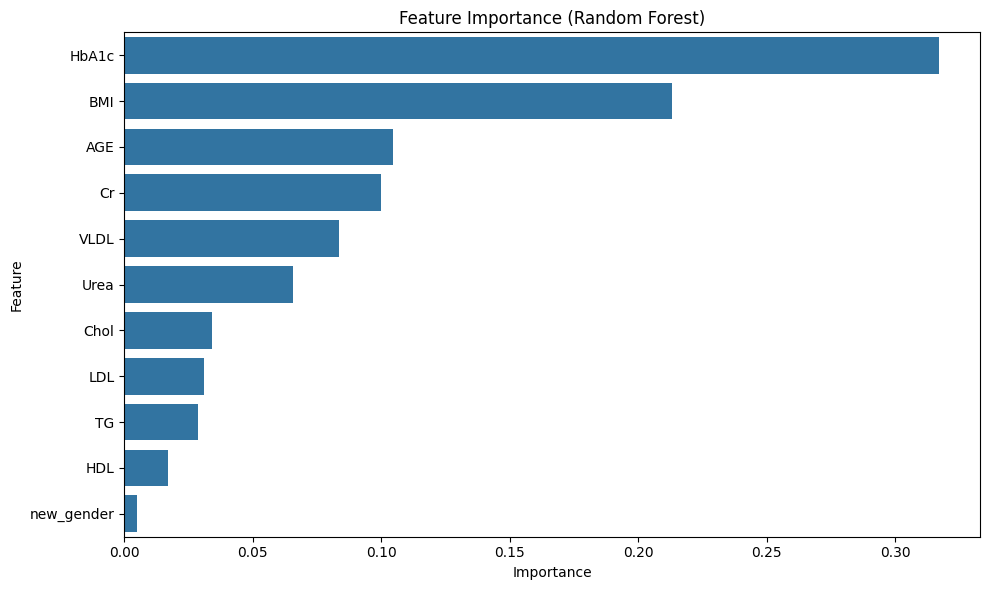

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = best_rfc.feature_importances_
features = df.drop(['new_class'], axis=1).columns

# Plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [26]:
error_rate=[]
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_test, y_test)
    pred_i = rfc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

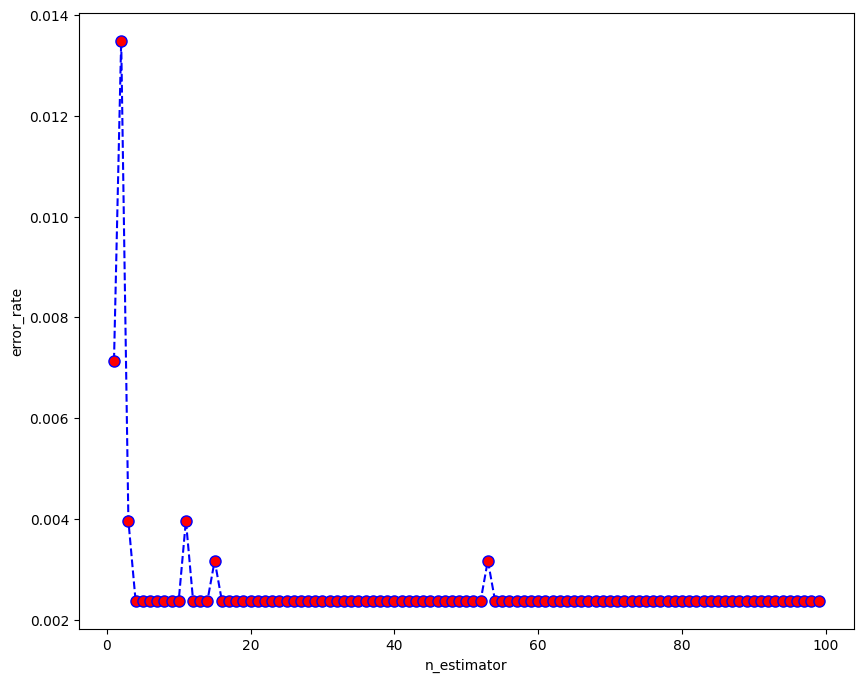

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 100), error_rate, marker='o', markersize=8, markerfacecolor='red', color='blue', linestyle='dashed')
plt.xlabel('n_estimator')
plt.ylabel('error_rate')

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rfc_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize and fit
grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rfc.fit(x_train, y_train)

# Best estimator and score
print("Best parameters:", grid_rfc.best_params_)
print("Best score:", grid_rfc.best_score_)

# Evaluate on test set
y_rfc_tuned_pred = grid_rfc.predict(x_test)
print(classification_report(y_test, y_rfc_tuned_pred))


Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9972789115646259
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       257
           4       0.99      1.00      0.99       258

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260



In [29]:
# Train a decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc_pred = dtc.predict(x_test)
print(classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.97      0.98       257
           4       0.98      1.00      0.99       258

    accuracy                           0.99      1260
   macro avg       0.99      0.99      0.99      1260
weighted avg       0.99      0.99      0.99      1260



In [30]:
# Train a support vector machine model
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
y_svm_pred = classifier.predict(x_test)
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       1.00      1.00      1.00       239
           2       0.97      1.00      0.98       256
           3       1.00      0.88      0.94       257
           4       0.96      1.00      0.98       258

    accuracy                           0.98      1260
   macro avg       0.98      0.98      0.98      1260
weighted avg       0.98      0.98      0.97      1260



In [31]:
# Save the trained model
pickle.dump(classifier, open('peace_modelD.pkl', 'wb'))

In [32]:
# Load the saved model
file = pickle.load(open('peace_modelD.pkl', 'rb'))

In [33]:
# Make a prediction
input_data = (50, 4.7, 46, 4.9, 4.2, 0.9, 2.4, 1.4, 0.5, 24.0, 0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = file.predict(input_data_reshaped)
print(prediction)

[3]


In [34]:
if prediction == 0:
    print('The person is not diabetes')
elif prediction == 1:
    print('The person is diabetes')
elif prediction == 2:
    print('Predicted diabetes')
else:
    print('Mixed prediction')

Mixed prediction


In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

Text(0.5, 1.0, 'Learning Curve')

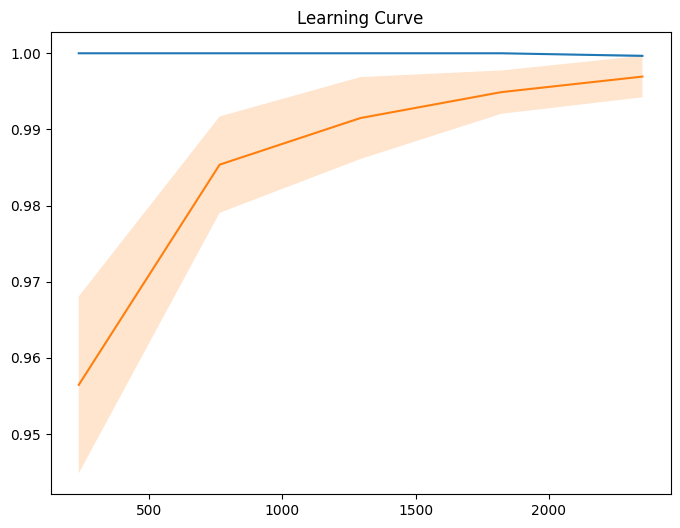

In [36]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve')

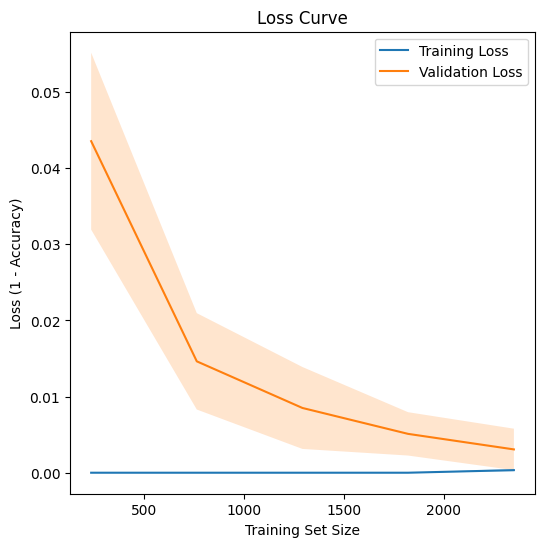

In [37]:
# Loss Curve
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.fill_between(train_sizes, 1 - train_mean + train_std, 1 - train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - test_mean + test_std, 1 - test_mean - test_std, alpha=0.2)
plt.title('Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.legend()
plt.show()

In [38]:
!pip install streamlit==1.42.2


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import streamlit
streamlit.__version__

'1.42.2'

In [40]:
import joblib
print(joblib.__version__)

1.4.2


In [41]:
import numpy
numpy.__version__

'2.2.3'

In [42]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
executable: c:\Users\HP\Desktop\NEW DIABETES\peaceenv\Scripts\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.0.1
   setuptools: 76.0.0
        numpy: 2.2.3
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.1
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libscipy_openblas
       filepath: C:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\numpy.libs\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll
        version: 0.3.28
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libscipy_openblas
       filepath: C:\Users\HP\Desktop\NEW DIABETES\peaceenv\Lib\site-packages\sci

In [43]:
import pandas
pandas.__version__


'2.2.3'

In [44]:
import matplotlib
matplotlib.__version__

'3.10.1'

In [45]:
import scipy
scipy.__version__

'1.15.2'

In [46]:
import pkg_resources

# Check scikit-learn version
print("Scikit-learn version:", sklearn.__version__)
import sys

print("Python version:", sys.version)

C:\Users\HP\AppData\Local\Temp\ipykernel_10952\2827503115.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Scikit-learn version: 1.6.1
Python version: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]


In [47]:
import seaborn

In [48]:
import pickle